In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal



In [2]:


data = np.loadtxt('data/ac2_9.csv', delimiter=',', skiprows=1)
df = pd.DataFrame(data)

x = data[:,0]
y = data[:,1]
z = data[:,2]
df



,0,1,2,3,4,5
0,0.695312,-0.203125,2.267090,6.821016,-1.992656,22.240151
1,0.789551,-0.105469,2.151855,7.745493,-1.034648,21.109702
2,0.829590,0.007324,2.095703,8.138276,0.071851,20.558848
3,0.868652,0.101074,2.032227,8.521479,0.991538,19.936143
4,0.889648,0.284668,2.069336,8.727451,2.792593,20.300186
...,...,...,...,...,...,...
28891,-0.228027,-0.960938,0.197754,-2.236948,-9.426797,1.939966
28892,-0.090820,-0.963379,-0.064453,-0.890947,-9.450747,-0.632285
28893,0.197266,-0.739746,-0.042969,1.935176,-7.256909,-0.421523
28894,0.388184,-0.190430,0.431152,3.808081,-1.868115,4.229604


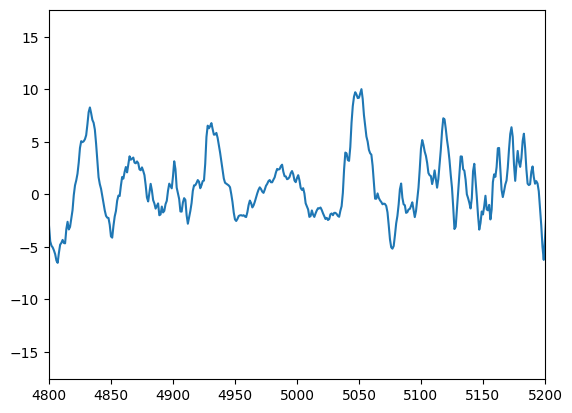

In [3]:
plt.xlim(4800,5200)
plt.plot(z)


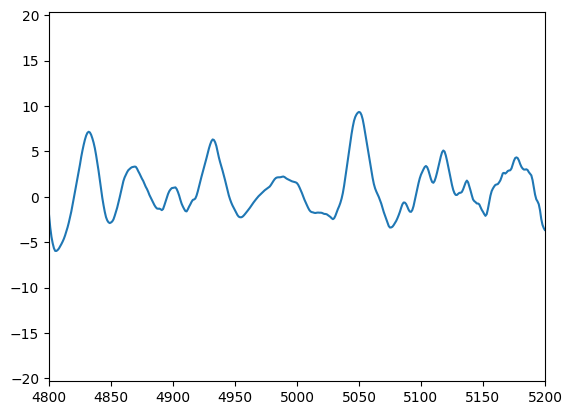

In [4]:
plt.xlim(4800,5200)
smooth_z = signal.savgol_filter(z, 21, 3)
plt.plot(smooth_z)

array([    0.  ,   288.96,   577.92,   866.88,  1155.84,  1444.8 ,
        1733.76,  2022.72,  2311.68,  2600.64,  2889.6 ,  3178.56,
        3467.52,  3756.48,  4045.44,  4334.4 ,  4623.36,  4912.32,
        5201.28,  5490.24,  5779.2 ,  6068.16,  6357.12,  6646.08,
        6935.04,  7224.  ,  7512.96,  7801.92,  8090.88,  8379.84,
        8668.8 ,  8957.76,  9246.72,  9535.68,  9824.64, 10113.6 ,
       10402.56, 10691.52, 10980.48, 11269.44, 11558.4 , 11847.36,
       12136.32, 12425.28, 12714.24, 13003.2 , 13292.16, 13581.12,
       13870.08, 14159.04, 14448.  , 14736.96, 15025.92, 15314.88,
       15603.84, 15892.8 , 16181.76, 16470.72, 16759.68, 17048.64,
       17337.6 , 17626.56, 17915.52, 18204.48, 18493.44, 18782.4 ,
       19071.36, 19360.32, 19649.28, 19938.24, 20227.2 , 20516.16,
       20805.12, 21094.08, 21383.04, 21672.  , 21960.96, 22249.92,
       22538.88, 22827.84, 23116.8 , 23405.76, 23694.72, 23983.68,
       24272.64, 24561.6 , 24850.56, 25139.52, 25428.48, 25717

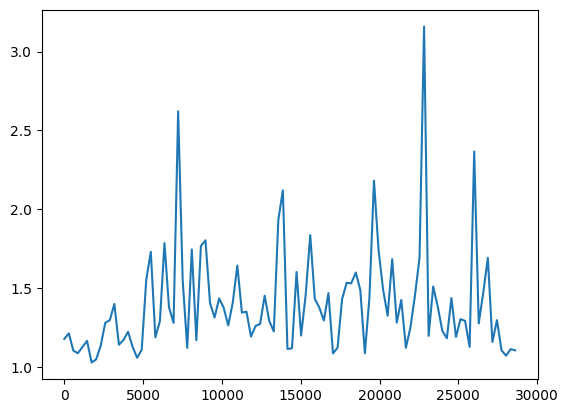

In [43]:
n_out = 100
n = z.size
env, res = signal.envelope(z, n_out=n_out)
t_out = np.arange(n_out) * (n / n_out)
#plt.xlim(4800,5200)
plt.plot(t_out, env+res)
#plt.plot(z)
#plt.plot(smooth_z)
t_out

(3000.0, 7000.0)

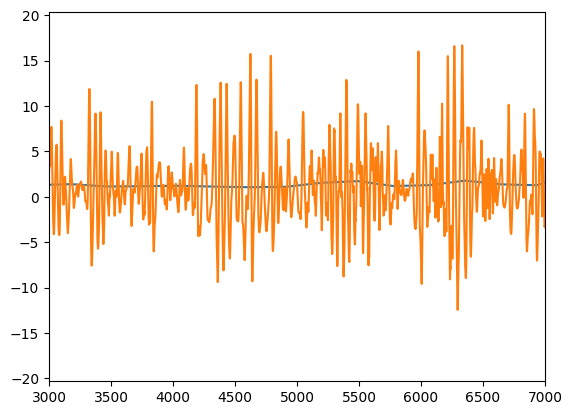

In [42]:

plt.figure()

plt.plot(t_out, env+res)
plt.plot(smooth_z)
plt.xlim(3000,7000)


In [57]:
peaks, width = signal.find_peaks(env+res, width=(2,11))
peaks* (n / n_out), width
plt.figure()

plt.plot(t_out, env+res)
plt.plot(smooth_z)
plt.xlim(3000,7000)
plt.vlines(x=peaks, ymin=x[peaks] - properties["prominences"],
           ymax = x[peaks], color = "C1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],
           xmax=properties["right_ips"], color = "C1")

(array([ 3178.56,  8957.76, 18493.44, 19649.28]),
 {'prominences': array([0.34181957, 0.61108113, 0.51298212, 1.06025643]),
  'left_bases': array([ 6, 27, 59, 59]),
  'right_bases': array([16, 41, 66, 75]),
  'widths': array([3.01230193, 2.21753248, 4.64476554, 2.07596375]),
  'width_heights': array([1.22731364, 1.49685325, 1.34147496, 1.65047809]),
  'left_ips': array([ 8.647587  , 29.55002017, 60.71655236, 67.28631102]),
  'right_ips': array([11.65988894, 31.76755265, 65.36131791, 69.36227477])})

(4800.0, 5000.0)

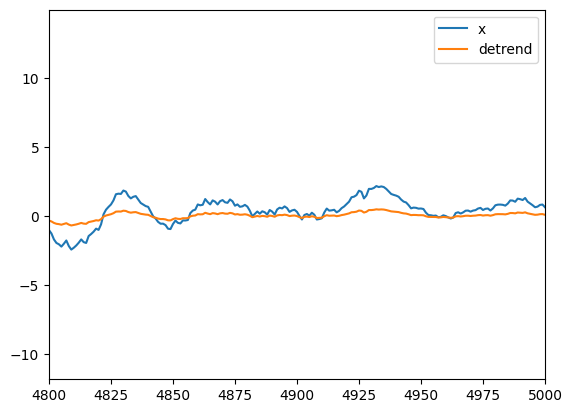

In [6]:
from scipy.signal import detrend, windows
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('data/ac2_9.csv', delimiter=',', skiprows=1)
detrend_data = detrend(data, axis=0)
window_length = detrend_data.shape[0]
window = windows.hann(window_length)
detrend_data = detrend_data * window[:, np.newaxis]
plt.plot(data[:, 0], label='x')
plt.plot(detrend_data[:, 0], label='detrend')
plt.legend()
plt.xlim(4800,5000)

In [ ]:
from scipy.signal import find_peaks
data = np.loadtxt('data/ac2_9.csv', delimiter=',', skiprows=1)
x = data[:,0]
peaks, properties = find_peaks(x, prominence=1, width=20)
properties["prominences"], properties["widths"]
(array([1.495, 2.3  ]), array([36.93773946, 39.32723577]))
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.vlines(x=peaks, ymin=x[peaks] - properties["prominences"],
           ymax = x[peaks], color = "C1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],
           xmax=properties["right_ips"], color = "C1")
plt.show()